### Individual Assignment 3: Interplay of Optimization and Machine Learning

### (Due on Oct 13, 11:59PM on LumiNUS)

### Preparation: Python Examples available in DataCamp Assigned Courses

(1) Logistic Regression and SVM: 3-min video "Applying logistic regression and SVM" in Chapter 1 of the course "Linear Classifiers in Python".
<br>
(2) Tree: 4-min video "Decision tree for classification" in Chapter 1 of the course "Machine Learning with Tree-Based Models in Python".




### Problem 1: 
In this problem, we are going to learn the optimal strategy of selecting the right path. Consider the a naive setting of the shortest path problem with only 2 arcs from source 1 to sink 2, as shown in Figure below.

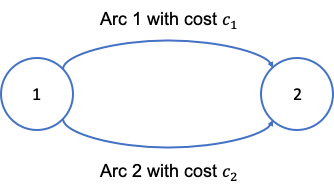

In [46]:
file_path = '2nodes.png'
Image(filename=file_path)

The optimal path can be obtained by solving $\min (c_1,c_2)$ where $c_1$ and $c_2$ are the cost on the arcs respectively. While it is a naive problem, we can still formulate it as an integer program (whose LP relaxation is tight):

$$\begin{align}
\min & \quad c_1x_1+c_2x_2\\
\mbox{s.t.} & \quad x_1+x_2=1\\
& \quad x_1, x_2 \in \{0,1\}.
\end{align}$$

After learning an optimal strategy, when we see a new instance with $(c_1,c_2)$, instead of solving an optimization problem(even a simple one), we can use the strategy to select the path. Thus, here we will
<br>
(1) Generate 50 traning samples and 50 test samples with $c_1$ uniformly distributed in $[2,5]$ and $c_2$ uniformly distributed in $[3,7]$. For each data point with $(c_1,c_2)$, solve for the optimal path $(x_1^*,x_2^*)$. \[For optimization part, you may use a solver or build your own function.\][1 point]
<br>
(2) Consider the strategy learning task as a binary classification problem with classes labeled by two feasible paths, i.e., $(x_1^*,x_2^*)=(1,0)$ or $(x_1^*,x_2^*)=(0,1)$. Develop classification models using Logistic Regression, SVM and Classification tree.[1 point]
<br>
(3) Evaluate the performance of the classification models above. You may simply compare by plain accuracy. [1 point]
<br>
(4) Elaborate the optimal strategy obtained from Logistic Regression, SVM, and Tree respectively. For example, you may plot the final Classification tree graph, and interpret spliting as a decision rule. (Hint: You can employ function plot_tree from sklearn.tree, remember to include feature_names and class_names in the function, so that it can generate an interpretable tree graph.)[1 point]
<br>
(5) Discuss any insights from their performances.[1 point]

### 1.1 Solve for the optimal path
Generate 50 traning samples and 50 test samples with $c_1$ uniformly distributed in $[2,5]$ and $c_2$ uniformly distributed in $[3,7]$. For each data point with $(c_1,c_2)$, solve for the optimal path $(x_1^*,x_2^*)$. \[For optimization part, you may use a solver or build your own function.\]

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from gurobipy import *
from graphviz import render
from IPython.display import Image

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# Define the optimal path selection function
def get_solution_1(c1, c2):
    m = Model("P1 model")

    # Create variables
    x1 = m.addVar(vtype=GRB.BINARY, name="x1")
    x2 = m.addVar(vtype=GRB.BINARY, name="x2")

    # Set objective
    m.setObjective(c1*x1+c2*x2, GRB.MINIMIZE)

    # Add constraint:
    m.addConstr(x1 + x2 == 1, "c0")

    m.params.outputflag = 0  # suppress the output
    m.optimize()
    return [round(i.x) for i in m.getVars()][0]

In [17]:
# Generate 50 traning samples and 50 test samples
np.random.seed(0)
c_1_lst = np.random.uniform(2, 5, 100)
c_2_lst = np.random.uniform(3, 7, 100)

# Generate the result
label_lst = []
for c_1, c_2 in zip(c_1_lst, c_2_lst):
    label_lst.append(get_solution_1(c_1, c_2))
print(label_lst)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]


### 1.2 Develop classification models
 - Consider the strategy learning task as a binary classification problem with classes labeled by two feasible paths.
 - i.e., $(x_1^*,x_2^*)=(1,0)$ or $(x_1^*,x_2^*)=(0,1)$. Develop classification models using Logistic Regression, SVM and Classification tree.

In [18]:
# Construct dataset
X = np.c_[c_1_lst,c_2_lst] # Translates slice objects to concatenation along the second axis.
y = np.array(label_lst)

# Split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Train logistic regression model
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

# Train SVM model
clf_svm = SVC(kernel="linear", random_state=0).fit(X_train, y_train)

# Train desicion tree model
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

### 1.3 Evaluate the performance
 - Evaluate the performance of the classification models above. 
You may simply compare by plain accuracy.

In [19]:
def evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    return (accuracy_score(y_test, y_pred))

print('Logistic Regression:', evaluate(clf_lr, X_test, y_test))
print('Support Vector Machine:', evaluate(clf_svm, X_test, y_test))
print('Desicion Tree:', evaluate(clf_dt, X_test, y_test))

Logistic Regression: 0.98
Support Vector Machine: 1.0
Desicion Tree: 0.96


### 1.4 Elaborate the optimal strategy
 - Elaborate the optimal strategy obtained from Logistic Regression, SVM, and Tree respectively. 
 - For example, you may plot the final Classification tree graph, and interpret spliting as a decision rule. 
 - Hint: You can employ function plot_tree from sklearn.tree, remember to include feature_names and class_names in the function, so that it can generate an interpretable tree graph.)

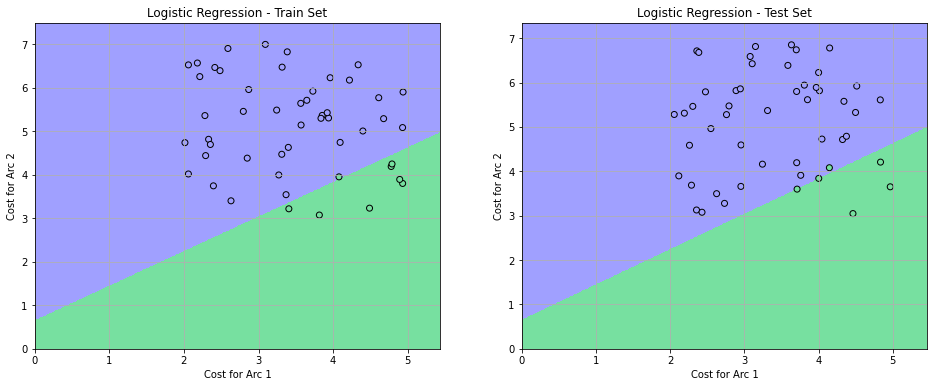

coef: [[-1.52439571  1.91603883]]
intercept: [-1.26569456]
classes: [0 1]


In [20]:
def plot_colormesh(ax, clf, X, y, title=''):
    # point in the mesh
    xmin, xmax = 0, X[:, 0].max() + 0.5
    ymin, ymax = 0, X[:, 1].max() + 0.5

    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(0, xmax, h),
                         np.arange(0, ymax, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
    ax.pcolormesh(xx, yy, Z, cmap=cm_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y,
               edgecolors='k', cmap=cm_light)
    ax.set_xlabel('Cost for Arc 1')
    ax.set_ylabel('Cost for Arc 2')

    ax.axis([xmin, xmax, ymin, ymax])

    ax.set_title(title)
    ax.grid()


def plot_double_mesh(clf, X_train, y_train, X_test, y_test, title=''):
    plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    subtitle = title + ' - Train Set'
    plot_colormesh(ax1, clf, X_train, y_train, title=subtitle)
    ax2 = plt.subplot(122)
    subtitle = title + ' - Test Set'
    plot_colormesh(ax2, clf, X_test, y_test, title=subtitle)
    plt.show()


# Elaborate the optimal strategy from Logistic Regression
plot_double_mesh(clf_lr, X_train, y_train, X_test, y_test, title='Logistic Regression')

print('coef:', clf_lr.coef_)
print("intercept:", clf_lr.intercept_)
print("classes:", clf_lr.classes_)

The classic solution for classification is logistic regression. Instead of fitting a hyperplane, the logistic regression model uses a method to squeeze the output between 0 and 1 called logistic function:

$$\operatorname{logistic}(\eta)=\frac{1}{1+\exp (-\eta)}$$

At input $\eta = 0$, it outputs 0.5.

And for classification, we could interpret the outcome as the probabilities:

$$P\left(y^{(i)}=1\right)=\frac{1}{1+\exp \left(-\left(\beta_{0}+\beta_{1} x_{1}^{(i)}+\ldots+\beta_{p} x_{p}^{(i)}\right)\right)}$$

**And below is the interpretation of the model results:**

 - The coefficient of feature 'Cost 1 for Arc 1' is negative: when the cost for Arc 1 is greater, the likelihood of its label being 0 is greater, which also means that Arc 1 is more likely to be the optimal solution.
 - The coefficient of feature 'Cost 2 for Arc 2' is positive:  Arc 2 is more likely to be the optimal solution, if the cost for Arc 2 is greater.
 - |Coefficient 1| $<$ |Coefficient 2|: The model is more sensitive to feature 'Cost 2 for Arc 2', compared to feature 'Cost 1 for Arc 1'.
 - The intercept is non-zero: In the real situation, the intercept of the model should be zero. The currently bias is caused by underfitting and limited samples.

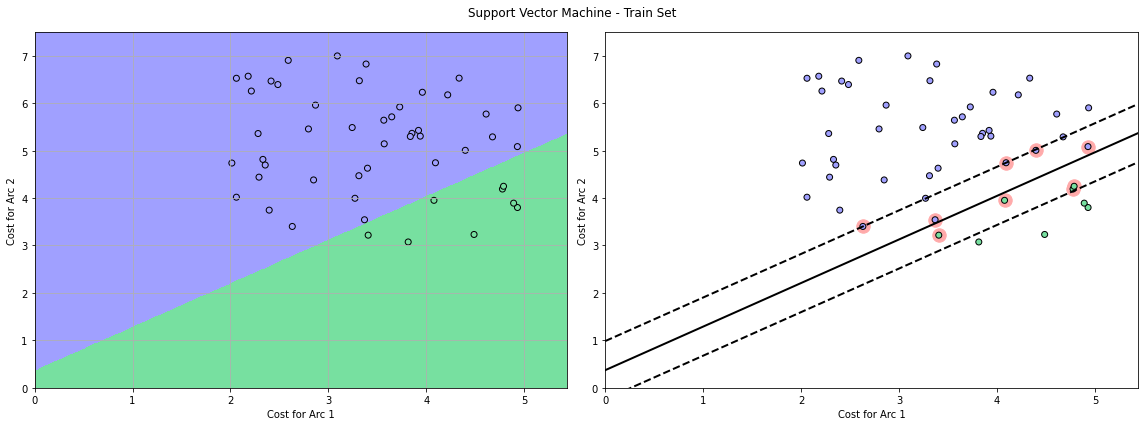

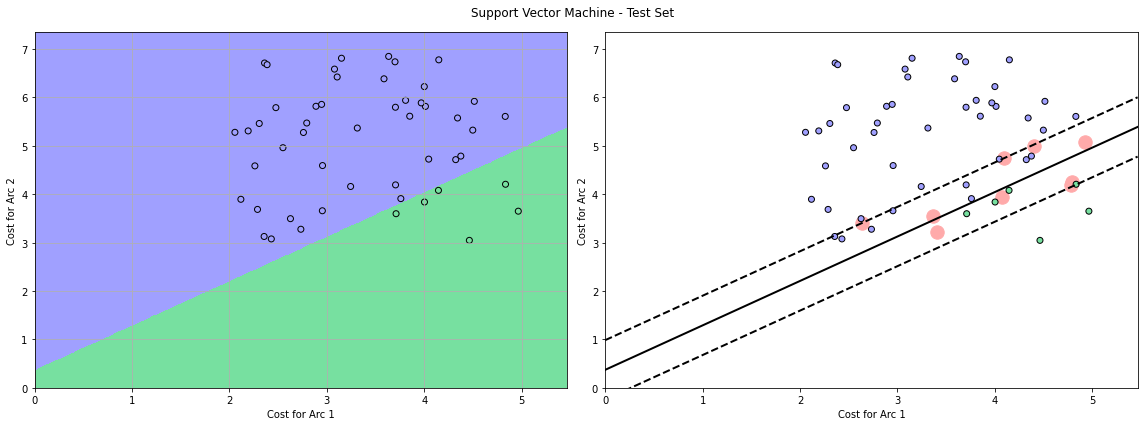

In [21]:
def plot_svm_boundary(ax, svm_clf, X, y):
    
    xmin, xmax = 0, X[:,0].max() + 0.5
    ymin, ymax = 0, X[:,1].max() + 0.5
    
    # Set the decision boundary
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # Plot support vector
    svs = svm_clf.support_vectors_
    ax.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

    # Plot boundary information
    ax.plot(x0, decision_boundary, "k-", linewidth=2)
    ax.plot(x0, gutter_up, "k--", linewidth=2)
    ax.plot(x0, gutter_down, "k--", linewidth=2)
    
    # Plot actual value
    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cm_light)
    
    # Set plot configuration
    ax.set_xlabel("Cost for Arc 1")
    ax.set_ylabel("Cost for Arc 2")
    ax.axis([xmin, xmax, ymin, ymax])
    
def plot_svm(svm_clf, X, y, title=''):
    plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    plot_colormesh(ax1, svm_clf, X, y)
    ax2 = plt.subplot(122)
    plot_svm_boundary(ax2, svm_clf, X, y)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    

# Elaborate the optimal strategy from SVM
plot_svm(clf_svm, X_train, y_train, title='Support Vector Machine - Train Set')
plot_svm(clf_svm, X_test, y_test, title='Support Vector Machine - Test Set')

 - The object of SVM is to select a hyperplane with the maximum possible margin between support vectors in the given dataset.
 - I implement the model using a **Linear Kernel**. but in this situation, there is no need to transform the 2-dimensional input space into a higher dimensional space because its not a nonseparable problem in 2-dimension.
 - The SVM model performs well on both train set and test set, the main reason is to consider the interaction between dimensions, also known as the methodology of finding the hyperplane.

In [22]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
DOT_PATH = os.path.join(PROJECT_ROOT_DIR, "dot")
os.makedirs(DOT_PATH, exist_ok=True)

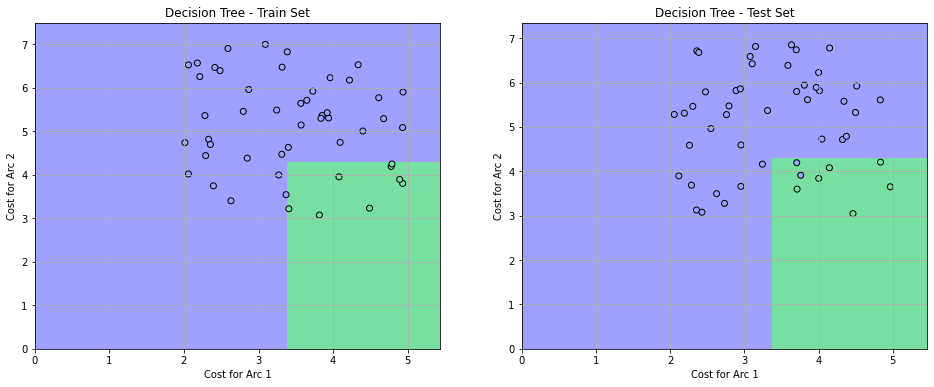

In [23]:
# Elaborate the optimal strategy from Decision Tree
plot_double_mesh(clf_dt, X_train, y_train, X_test, y_test, title='Decision Tree')

In [24]:
# Elaborate the optimal strategy from Tree
feature_names = ['Cost for Arc 1','Cost for Arc 2']
target_names = ['Arc 2', 'Arc 1']
file_path = os.path.join(DOT_PATH, "decision_tree.dot")
export_graphviz(
    clf_dt,
    out_file=file_path,
    feature_names=feature_names,
    class_names=target_names,
    rounded=True,
    filled=True
)

In [ ]:
render('dot', 'png', file_path)

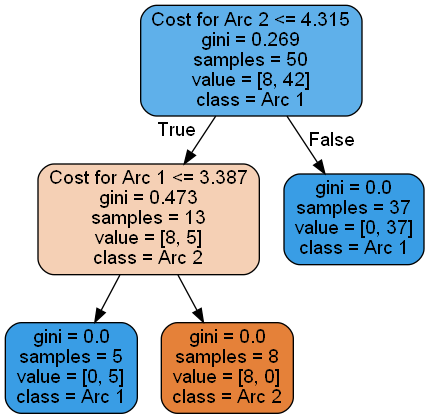

In [45]:
file_path = './dot/decision_tree.png'
Image(filename=file_path)

The decision tree is to partition the data into subsets that contain instances with similar values.
Interpretation of the model:
 - If the Cost for Arc 2 is greater than 4.315, the model will label the instance as class Arc 1.
 - And for the instances whose Cost for Arc 2 is less than or equal to 4.315
   - If the Cost for Arc 1 is less than or equal to 3.387, the model will label the instance as class Arc 1.
   - Others will be labeled as class Arc 2.

It can be seen that the desicion tree is not suitable in solving the linear separable problem, and also cannot capture the real logic that behind the data. That is also the reason why decision tree can't perform well on the test dataset, even if it can perform very well in the trainning set.

### 1.5 Discuss insights
Discuss any insights from their performances.

 - Logistic regression can correctly reflect the relation between a feature and the label, but it cannot reflect the interactions among features.
 - SVM is very effective in solving linear problems, and can capture the interaction between features through the hyperplane.

### Problem 2: 
Now, we consider a (not-so-naive) shortest path problem as shown in Figure below:

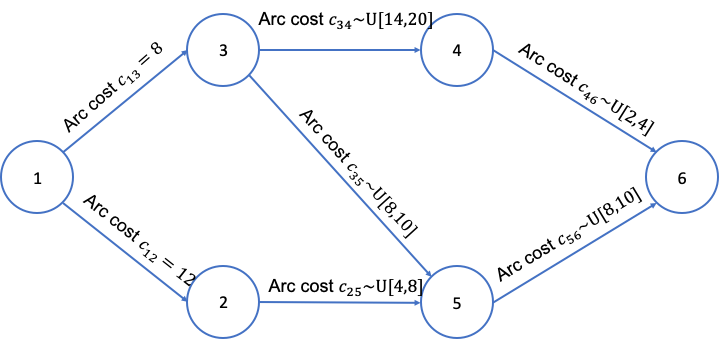

In [47]:
Image(filename='5nodes.png')

Formulate the shortest path problem as:

$$\begin{align}
\min & \quad c_{13}x_{13}+c_{12}x_{12}+c_{25}x_{25}+c_{34}x_{34}+c_{35}x_{35}+c_{46}x_{46}+c_{56}x_{56}\\
\mbox{s.t.} & \quad x_{12}+x_{13}=1\\
& \quad x_{12}=x_{25}\\
& \quad x_{13}=x_{34}+x_{35}\\
& \quad x_{34}=x_{46}\\
& \quad x_{35}+x_{25}=x_{56}\\
& \quad x_{12}, x_{13},x_{25},x_{34},x_{35}, x_{46},x_{56} \in \{0,1\}.
\end{align}$$

By learning an optimal strategy, when we see a new instance with parameters $(c_{25},c_{35},c_{34},c_{46},c_{56})$, instead of solving the optimization problem, we can apply the optimal strategy to select the path. Thus, here we will
<br>
(1) Generate 50 traning samples and 50 test samples with $(c_{25},c_{35},c_{34},c_{46},c_{56})$ uniformly draw from the intervals specified on the arcs. For each sample, solve for the optimal path.[1 point]
<br>
(2) Consider the strategy learning task as a multiclass classification problem. <b>Clearly define the class labels.</b> Develop classification models using Logistic Regression, SVM and Classification tree.[1 point]
<br>
(3) Evaluate the performance of the classification models above. You may simply compare by plain accuracy.[1 point]
<br>
(4) Elaborate the optimal strategy obtained from Logistic Regression, SVM, and Tree respectively. For example, you may plot the final Classification tree graph, and interpret spliting as a decision rule. (Hint: You can employ function plot_tree from sklearn.tree, remember to include feature_names and class_names in the function, so that it can generate an interpretable tree graph.)[1 point]
<br>
(5) Discuss any insights from their performances.[1 point]

### 2.1 Solve for the optimal path
Generate 50 traning samples and 50 test samples with $(c_{25},c_{35},c_{34},c_{46},c_{56})$ uniformly draw from the intervals specified on the arcs. For each sample, solve for the optimal path.

In [25]:
# The optimization model is provided to generate data
def get_solution(c25,c35,c34,c46,c56):
    m = Model("P2 model")

    # Create variables
    x12 = m.addVar(vtype=GRB.BINARY, name="x12")
    x13 = m.addVar(vtype=GRB.BINARY, name="x13")
    x25 = m.addVar(vtype=GRB.BINARY, name="x25")
    x34 = m.addVar(vtype=GRB.BINARY, name="x34")
    x35 = m.addVar(vtype=GRB.BINARY, name="x35")
    x46 = m.addVar(vtype=GRB.BINARY, name="x46")
    x56 = m.addVar(vtype=GRB.BINARY, name="x56")

    c13 = 8
    c12 = 12
    # Set objective
    m.setObjective(c13*x13+c12*x12+c25*x25+c34*x34+c35*x35+c46*x46+c56*x56, GRB.MINIMIZE)

    # Add constraint: 
    m.addConstr(x12 + x13  == 1, "c0")
    m.addConstr(x12 == x25, "c1")
    m.addConstr(x13 == x34 + x35, "c1")
    m.addConstr(x34 == x46, "c1")
    m.addConstr(x35 + x25 == x56, "c1")
    m.params.outputflag = 0; # suppress the output 
    m.optimize()
    return [round(i.x) for i in m.getVars()]

In [26]:
# Generate 50 traning samples and 50 test samples
c25_lst = np.random.uniform(4,8,100)
c34_lst = np.random.uniform(14,20,100)
c35_lst = np.random.uniform(8,10,100)
c46_lst = np.random.uniform(2,4,100)
c56_lst = np.random.uniform(8,10,100)

# Generate the result
label_lst = []
for c25, c35, c34, c46, c56 in zip(c25_lst, c35_lst, c34_lst, c46_lst, c56_lst):
    label_lst.append(get_solution(c25, c35, c34, c46, c56))

label_option = list(set([tuple(i) for i in label_lst]))

label_lst_num = [label_option.index(tuple(i)) for i in label_lst]

In [27]:
path_lst = ['Arc 1 to 2','Arc 1 to 3','Arc 2 to 5','Arc 3 to 4','Arc 3 to 5','Arc 4 to 6','Arc 5 to 6']
for k in range(len(label_option)):
    print(f"\nLabel {k}: ")
    label = label_option[k]
    for i in range(len(label)):
        flag = 'SELECTED' if label[i] else 'NA'
        print(f'{path_lst[i]}: {flag}')


Label 0: 
Arc 1 to 2: NA
Arc 1 to 3: SELECTED
Arc 2 to 5: NA
Arc 3 to 4: SELECTED
Arc 3 to 5: NA
Arc 4 to 6: SELECTED
Arc 5 to 6: NA

Label 1: 
Arc 1 to 2: SELECTED
Arc 1 to 3: NA
Arc 2 to 5: SELECTED
Arc 3 to 4: NA
Arc 3 to 5: NA
Arc 4 to 6: NA
Arc 5 to 6: SELECTED

Label 2: 
Arc 1 to 2: NA
Arc 1 to 3: SELECTED
Arc 2 to 5: NA
Arc 3 to 4: NA
Arc 3 to 5: SELECTED
Arc 4 to 6: NA
Arc 5 to 6: SELECTED


### 2.2 Develop classification models
 - Consider the strategy learning task as a multiclass classification problem. 
 - Clearly define the class labels.
 - Develop classification models using Logistic Regression, SVM and Classification tree.

In [28]:
# Construct dataset
# Translates slice objects to concatenation along the second axis.
X = np.c_[c25_lst, c34_lst, c35_lst, c46_lst, c56_lst]
y = np.array(label_lst_num)

# Split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Train logistic regression model
clf_lr = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

# Train SVM model
clf_svm = SVC(kernel="linear", random_state=0).fit(X_train, y_train)

# Train desicion tree model
clf_dt = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)

### 2.3 Evaluate the performance
Evaluate the performance of the classification models above. You may simply compare by plain accuracy.

In [29]:
print('Logistic Regression:', evaluate(clf_lr, X_test, y_test))
print('Support Vector Machine:', evaluate(clf_svm, X_test, y_test))
print('Desicion Tree:', evaluate(clf_dt, X_test, y_test))

Logistic Regression: 0.94
Support Vector Machine: 0.92
Desicion Tree: 0.68


### 2.4 Elaborate the optimal strategy
Elaborate the optimal strategy obtained from Logistic Regression, SVM, and Tree respectively. For example, you may plot the final Classification tree graph, and interpret spliting as a decision rule. (Hint: You can employ function plot_tree from sklearn.tree, remember to include feature_names and class_names in the function, so that it can generate an interpretable tree graph.)

In [30]:
# Elaborate the optimal strategy from Logistic Regression
print('coef:', clf_lr.coef_)
print("intercept:", clf_lr.intercept_)
print("classes:", clf_lr.classes_)

coef: [[ 0.48407659 -1.18693028  0.37635452 -1.14604283  0.8913668 ]
 [-1.47002506  0.57078864  0.66256691  0.66688902 -0.31600854]
 [ 0.98594847  0.61614164 -1.03892143  0.47915381 -0.57535826]]
intercept: [ 7.57932102 -6.4343607  -1.14496032]
classes: [0 1 2]


 - By default, multi_class is set to ’ovr’.
 - In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’
 - The model has a 94% accuracy.


In [31]:
# boundary
def print_boundary(clf):
    feature_lst = ['𝑐25','𝑐35','𝑐34','𝑐46','𝑐56']
    for i in range(len(clf.classes_)):
        print(f'Boundary for class {i}')
        boundary = f'0 = {clf.intercept_[i]}\n'
        for j in range(len(clf.coef_[0])):
            boundary += f' + ({clf.coef_[i][j]} * {feature_lst[j]})\n'
        print(boundary)

print_boundary(clf_lr)

Boundary for class 0
0 = 7.579321016996541
 + (0.48407659380317075 * 𝑐25)
 + (-1.186930279761278 * 𝑐35)
 + (0.37635452185117385 * 𝑐34)
 + (-1.1460428281125206 * 𝑐46)
 + (0.8913667995230973 * 𝑐56)

Boundary for class 1
0 = -6.434360697703875
 + (-1.4700250602344964 * 𝑐25)
 + (0.5707886436796669 * 𝑐35)
 + (0.6625669080466899 * 𝑐34)
 + (0.6668890188355678 * 𝑐46)
 + (-0.316008542797998 * 𝑐56)

Boundary for class 2
0 = -1.1449603192895212
 + (0.9859484664346957 * 𝑐25)
 + (0.6161416360801852 * 𝑐35)
 + (-1.0389214298957956 * 𝑐34)
 + (0.47915380927770723 * 𝑐46)
 + (-0.5753582567251421 * 𝑐56)



In [32]:
# Elaborate the optimal strategy from Support Vector Machine
print_boundary(clf_svm)

Boundary for class 0
0 = 6.362169750576923
 + (0.5449745810434905 * 𝑐25)
 + (-0.945017044377984 * 𝑐35)
 + (0.01719846121027757 * 𝑐34)
 + (-1.1511054881129272 * 𝑐46)
 + (0.9197574140441596 * 𝑐56)

Boundary for class 1
0 = 2.7410611976084556
 + (-0.051479966209537764 * 𝑐25)
 + (-1.1108167132157405 * 𝑐35)
 + (0.9153943059985217 * 𝑐34)
 + (-1.430245891140796 * 𝑐46)
 + (1.092918763751623 * 𝑐56)

Boundary for class 2
0 = -2.346486875915857
 + (-1.7841966616451757 * 𝑐25)
 + (0.0677050212887309 * 𝑐35)
 + (1.1318647324323337 * 𝑐34)
 + (0.30254551457441003 * 𝑐46)
 + (-0.12029909586807719 * 𝑐56)



In [33]:
# Elaborate the optimal strategy from Tree
feature_names = ['Cost for Arc 25', 'Cost for Arc 35', 'Cost for Arc 34', 'Cost for Arc 46','Cost for Arc 56']
target_names = ['Arc 1-3-4-6', 'Arc 1-2-5-6', 'Arc 1-3-5-6']
file_path = os.path.join(DOT_PATH, "decision_tree_2.dot")
export_graphviz(
    clf_dt,
    out_file=file_path,
    feature_names=feature_names,
    class_names=target_names,
    max_depth=5,
    rounded=True,
    filled=True
)
render('dot', 'png', file_path)

'.\\dot\\decision_tree_2.dot.png'

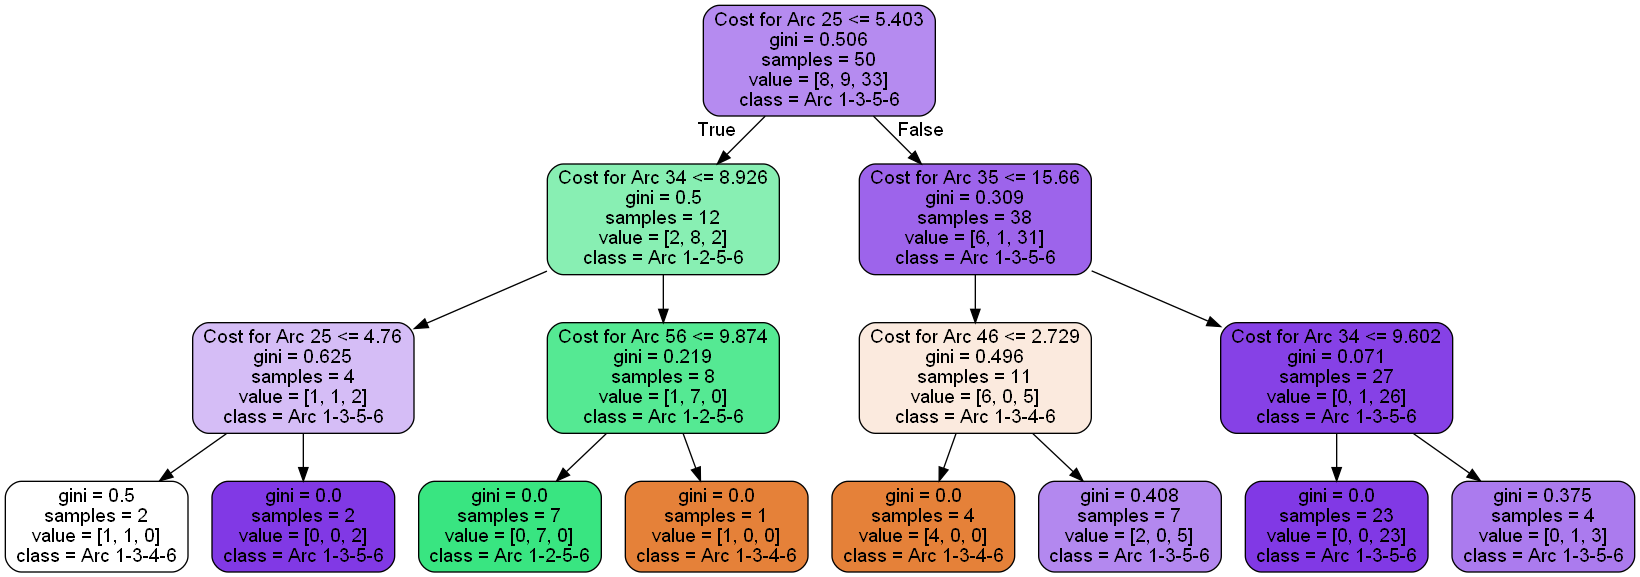

In [39]:
file_path = './dot/decision_tree_2.png'
Image(filename=file_path)

### 2.5 Discuss insights
Discuss any insights from their performances.

 - The results of SVM are not stable in the test set, because not all samples are used to determine the hyperplane, in fact, only few points that really matter in terms of constructing the model.
 - The tree model is able to capture a pattern that can work well in train set, but the pattern may not reflect the real situation, even sometimes theoretically wrong.